<a href="https://colab.research.google.com/github/LadanTRZ/Financial-Instrument-Simulation-and-Analysis/blob/main/Financial_Instrument_Simulation_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Performance:
{'Returns': array([ 1.64891398e+00,  1.30427580e-02,  1.59830914e+00,  4.98060548e-01,
        1.61174240e+00,  9.48886100e-01,  3.24237824e+00, -5.49682228e-01,
        4.55964703e-01,  1.31345114e+00,  7.77015879e-01,  3.40121612e-01,
       -5.44422435e-01,  9.12685921e-01,  1.24314600e+00,  5.72223909e-01,
        1.23228406e+00,  1.30651911e+00,  2.93386875e+00,  2.52794026e+00,
        4.38570786e-01,  3.12622109e+00,  2.48569201e-01, -1.31111955e-01,
        6.55547711e-01,  5.68692329e-01,  1.26764291e+00,  1.78145443e+00,
        2.39902167e-01, -2.32715421e-01,  1.65977524e-01,  1.30164126e+00,
        1.17441496e+00, -1.16988176e-01, -3.62366574e-01,  2.02896743e+00,
        3.91963977e+00,  1.70087130e+00,  1.86216229e+00,  8.22295490e-01,
        7.30316304e-01, -5.89365062e-02,  5.88623908e-01,  2.58647467e+00,
        2.09409999e+00,  4.12645884e-01,  1.71726818e-01,  5.74105703e-02,
       -4.92447247e-01,  2.54312260e-01,  8.55780409e-01,  1.20974195

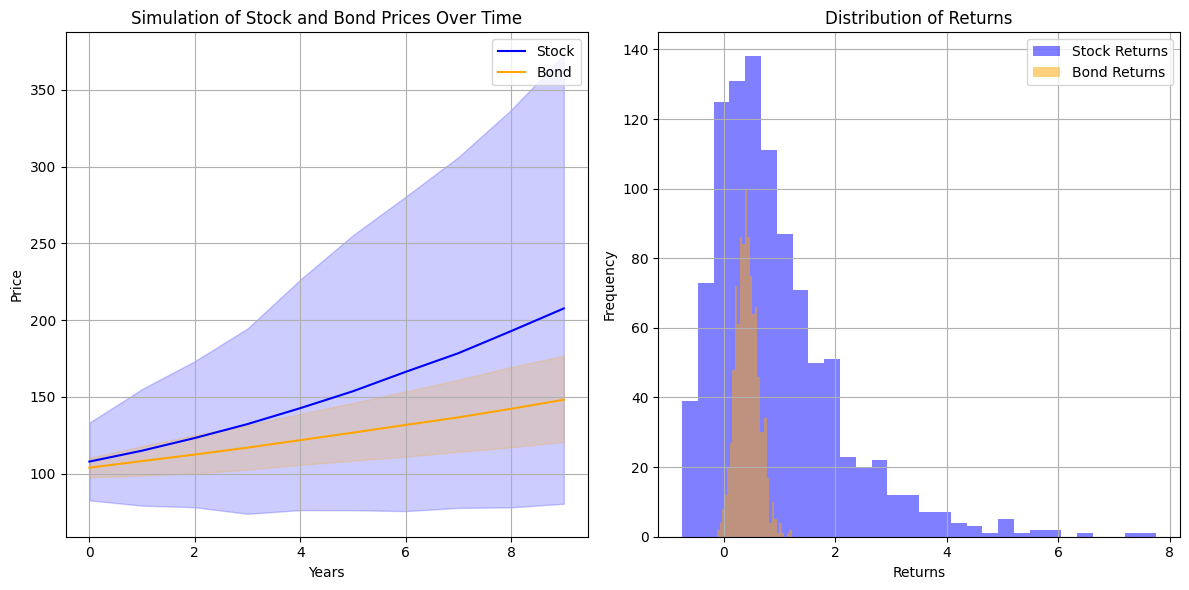

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def run_simulation(initial_price, volatility, expected_return, years, num_simulations):
    prices_over_time = np.zeros((years, num_simulations))
    for i in range(num_simulations):
        price = initial_price
        for year in range(years):
            price *= np.random.normal(1 + expected_return, volatility)
            prices_over_time[year, i] = price
    return prices_over_time

def calculate_performance(prices_over_time):
    returns = (prices_over_time[-1] / prices_over_time[0]) - 1
    avg_return = np.mean(returns)
    volatility = np.std(returns)
    sharpe_ratio = avg_return / volatility
    max_drawdown = np.max(np.maximum.accumulate(prices_over_time, axis=0) - prices_over_time, axis=0)
    return {
        'Returns': returns,
        'Average Return': avg_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    }

def plot_simulation(prices_over_time_stock, prices_over_time_bond, years):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(years), prices_over_time_stock.mean(axis=1), label='Stock', color='blue')
    plt.plot(np.arange(years), prices_over_time_bond.mean(axis=1), label='Bond', color='orange')
    plt.fill_between(np.arange(years), np.percentile(prices_over_time_stock, 10, axis=1), np.percentile(prices_over_time_stock, 90, axis=1), color='blue', alpha=0.2)
    plt.fill_between(np.arange(years), np.percentile(prices_over_time_bond, 10, axis=1), np.percentile(prices_over_time_bond, 90, axis=1), color='orange', alpha=0.2)
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.title('Simulation of Stock and Bond Prices Over Time')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.hist(performance_stock['Returns'], bins=30, alpha=0.5, label='Stock Returns', color='blue')
    plt.hist(performance_bond['Returns'], bins=30, alpha=0.5, label='Bond Returns', color='orange')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.title('Distribution of Returns')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
initial_price_stock = 100
volatility_stock = 0.2
expected_return_stock = 0.08

initial_price_bond = 100
volatility_bond = 0.05
expected_return_bond = 0.04

years = 10
num_simulations = 1000

# Run simulation
prices_over_time_stock = run_simulation(initial_price_stock, volatility_stock, expected_return_stock, years, num_simulations)
prices_over_time_bond = run_simulation(initial_price_bond, volatility_bond, expected_return_bond, years, num_simulations)

# Calculate performance metrics
performance_stock = calculate_performance(prices_over_time_stock)
performance_bond = calculate_performance(prices_over_time_bond)

# Print performance metrics
print("Stock Performance:")
print(performance_stock)
print("\nBond Performance:")
print(performance_bond)

# Plot results
plot_simulation(prices_over_time_stock, prices_over_time_bond, years)